In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']=(20,10)
%matplotlib inline

In [2]:
#uploading dataset
df = pd.read_csv('Bengeluru_House_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [6]:
#droping area and society column 
df2 = df.drop(['area_type','society'], axis=1)

In [7]:
df2.head()

,availability,location,size,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
df2.isnull().sum()

availability      0
location          0
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [9]:
df2.groupby('balcony')['balcony'].agg('count')

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [10]:
#fill na by 0.0
df2['balcony'] = df2['balcony'].fillna(0.0)

In [11]:
df2.groupby('bath')['bath'].agg('count')

bath
1.0      788
2.0     6908
3.0     3286
4.0     1226
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
11.0       3
12.0       7
13.0       3
14.0       1
15.0       1
16.0       2
18.0       1
27.0       1
40.0       1
Name: bath, dtype: int64

In [12]:
#fill na by 1.0
df2['bath'] = df2['bath'].fillna(1.0)

In [13]:
df3 = df2.dropna()
df3.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [14]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
#splitting size into integer
df3['size'].apply(lambda x: int(x.split()[0]))

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13304, dtype: int64

In [16]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split()[0]))

C:\Users\Rishit\AppData\Local\Temp\ipykernel_15964\1744187461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x: int(x.split()[0]))


In [17]:
df3.head()

,availability,location,size,total_sqft,bath,balcony,price,BHK
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [18]:
df4 = df3.drop(['size'],axis=1)
df4.head()

,availability,location,total_sqft,bath,balcony,price,BHK
0,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2


In [19]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
#to check data inrange

def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True


In [21]:
df4[~df4['total_sqft'].apply(isfloat)].sample(5)

,availability,location,total_sqft,bath,balcony,price,BHK
2998,19-May,Sarjapur Road,1446 - 1506,1.0,0.0,98.940,3
2713,Ready To Move,KR Puram,1255 - 1863,3.0,0.0,69.315,3
1765,19-Dec,Binny Pete,2695 - 2940,1.0,0.0,204.000,4
9050,22-Dec,Bannerghatta Road,1365 - 1700,3.0,0.0,79.465,3
549,18-Sep,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


In [22]:
#convert range to float
import re

def convert(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))//2
    try:
        return float(x)
    except:
        return re.sub("\D.+", "", x)

In [23]:
print(convert('43543'))
print(convert('43543 - 32433'))
print(convert('43543.34ch'))

43543.0
37988.0
43543


In [24]:
df4['total_sqft']= df4['total_sqft'].apply(convert)

In [25]:
df4['total_sqft']= df4['total_sqft'].astype(float)

In [26]:
df5 = df4.copy()

In [27]:
#creating new column price per sqft
df5['pp_sqft']= df5['price']*100000/df5['total_sqft']
df5.head(3)

,availability,location,total_sqft,bath,balcony,price,BHK,pp_sqft
0,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556


In [28]:
len(df5['location'].unique())

1304

In [29]:
df5['location']= df5['location'].apply(lambda x: x.strip())

In [30]:
loc_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [31]:
loc_stats[loc_stats<15]

location
Doddakallasandra         14
1st Block Jayanagar      14
Giri Nagar               14
Jalahalli East           14
Sarakki Nagar            14
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1107, dtype: int64

(array([1.186e+03, 6.100e+01, 2.200e+01, 9.000e+00, 1.000e+00, 4.000e+00,
        4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,  27.95,  54.9 ,  81.85, 108.8 , 135.75, 162.7 , 189.65,
        216.6 , 243.55, 270.5 , 297.45, 324.4 , 351.35, 378.3 , 405.25,
        432.2 , 459.15, 486.1 , 513.05, 540.  ]),
 <BarContainer object of 20 artists>)

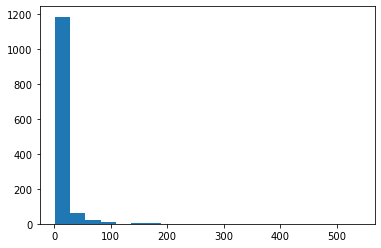

In [32]:
plt.hist(loc_stats,bins= 20)

In [33]:
other = loc_stats[loc_stats<25]
other

location
Kambipura                24
Battarahalli             24
2nd Stage Nagarbhavi     24
Amruthahalli             24
Abbigere                 24
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1170, dtype: int64

In [34]:
#converting low count location into others
df5['location']= df5['location'].apply(lambda x: 'others' if x in other else x)

In [35]:
len(df5.location.unique())

124

In [36]:
df5.sample(3)

,availability,location,total_sqft,bath,balcony,price,BHK,pp_sqft
11727,18-Mar,Kothanur,1140.0,2.0,2.0,56.0,2,4912.280702
4154,Ready To Move,Jakkur,1290.0,2.0,1.0,80.0,2,6201.550388
10880,Ready To Move,Thanisandra,1188.0,2.0,1.0,39.0,2,3282.828283


In [37]:
df5['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [38]:
def time(x):
    if x=='Ready To Move':
        return x
    else:
        return 'timeline'

In [39]:
print(time('Ready To Move'))

Ready To Move


In [40]:
#converting date into timeline
df5['availability'] = df5['availability'].apply(time)

In [41]:
df5.sample(5)

,availability,location,total_sqft,bath,balcony,price,BHK,pp_sqft
5438,timeline,Jakkur,1482.0,3.0,2.0,86.0,3,5802.968961
3382,Ready To Move,Hegde Nagar,1801.0,3.0,2.0,140.0,3,7773.459189
8663,Ready To Move,Hebbal Kempapura,1800.0,3.0,3.0,150.0,3,8333.333333
8321,Ready To Move,Electronic City Phase II,1900.0,3.0,1.0,97.0,4,5105.263158
5788,Ready To Move,others,800.0,2.0,2.0,30.0,2,3750.000000


In [42]:
df6= df5.copy()

In [43]:
df6.describe()

,total_sqft,bath,balcony,price,BHK,pp_sqft
count,13304.000000,13304.000000,13304.000000,13304.000000,13304.000000,1.330400e+04
mean,1555.151996,2.685358,1.513755,112.582035,2.803743,1.289064e+04
std,1238.927416,1.343139,0.863166,148.988398,1.294974,2.584711e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.272727e+03
50%,1275.000000,2.000000,2.000000,72.000000,3.000000,5.446009e+03
75%,1676.250000,3.000000,2.000000,120.000000,3.000000,7.338540e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,2.000000e+07


In [44]:
df7 = df6[~(df6['total_sqft']<100)]

In [45]:
df7 = df7[~(df7['bath']>10)]

In [46]:
df7[df7['price']<10]

,availability,location,total_sqft,bath,balcony,price,BHK,pp_sqft
8594,Ready To Move,Chandapura,450.0,1.0,1.0,9.0,1,2000.000000
10526,Ready To Move,Yelahanka New Town,284.0,1.0,1.0,8.0,1,2816.901408


In [47]:
df7.shape

(13258, 8)

In [48]:
#removing outliers
def remove_outlier(df):
    df_out= pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.pp_sqft)
        st= np.std(subdf.pp_sqft)
        reduced_df = subdf[(subdf.pp_sqft>(m-st)) & (subdf.pp_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [49]:
df7 = remove_outlier(df7)
df7.shape

(11382, 8)

In [50]:
df7 = df7.drop(['pp_sqft','availability','balcony'],axis=1)
df7.head()

,location,total_sqft,bath,price,BHK
0,1st Phase JP Nagar,2825.0,4.0,250.0,4
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1500.0,5.0,85.0,5
3,1st Phase JP Nagar,2065.0,4.0,210.0,3
4,1st Phase JP Nagar,2024.0,3.0,157.0,3


In [51]:
df7.describe()

,total_sqft,bath,price,BHK
count,11382.000000,11382.000000,11382.000000,11382.000000
mean,1494.476433,2.528993,91.508355,2.650940
std,867.524880,1.063734,83.730495,1.011757
min,167.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,49.000000,2.000000
50%,1275.000000,2.000000,68.000000,3.000000
75%,1650.000000,3.000000,102.000000,3.000000
max,30400.000000,10.000000,2200.000000,11.000000


In [52]:
df7.shape

(11382, 5)

In [53]:
df7.head()    

,location,total_sqft,bath,price,BHK
0,1st Phase JP Nagar,2825.0,4.0,250.0,4
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1500.0,5.0,85.0,5
3,1st Phase JP Nagar,2065.0,4.0,210.0,3
4,1st Phase JP Nagar,2024.0,3.0,157.0,3


In [55]:
df7.to_csv('Cleaned_data.csv')

In [58]:
X = df7.drop('price', axis=1)
y = df7['price']

## Applying Linear Regression

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [113]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [114]:
print(X_train.shape)
print(X_test.shape)

(9105, 4)
(2277, 4)


In [115]:
X_test.head(3)

,location,total_sqft,bath,BHK
450,Attibele,656.0,2.0,2
121,7th Phase JP Nagar,1000.0,2.0,2
4980,Raja Rajeshwari Nagar,1250.0,2.0,2


In [116]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [117]:
scaler = StandardScaler()

In [118]:
lr = LinearRegression()

In [119]:
pipe = make_pipeline(column_trans,scaler,lr)

In [120]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [121]:
y_pred_lr = pipe.predict(X_test)

In [122]:
r2_score(y_test, y_pred_lr)

0.8254521807618349

## Applying Lasso

In [123]:
lass = Lasso()
pipe = make_pipeline(column_trans,scaler,lass)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [124]:
y_pred_lass = pipe.predict(X_test)

In [125]:
r2_score(y_test, y_pred_lass)

0.8178838239896362

## Applying Ridge

In [126]:
rdg = Ridge()
pipe = make_pipeline(column_trans,scaler,rdg)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [127]:
y_pred_rd = pipe.predict(X_test)

In [128]:
r2_score(y_test, y_pred_rd)

0.8254682048744788

In [129]:
print("Linear Reg: ",r2_score(y_test, y_pred_lr))
print("Lasso: ",r2_score(y_test, y_pred_lass))
print("Ridge: ",r2_score(y_test, y_pred_rd))

Linear Reg:  0.8254521807618349
Lasso:  0.8178838239896362
Ridge:  0.8254682048744788


## Creating pickle file

In [130]:
import pickle
pickle.dump(pipe,open('RidgeModel.pkl','wb'))